In [ ]:
Linear Regression

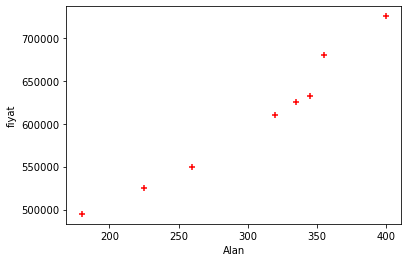

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df=pd.read_csv("linearregression.csv",sep=";")
plt.xlabel("Alan")
plt.ylabel("fiyat")
plt.scatter(df.alan,df.fiyat,color="red",marker="+")

In [9]:
df.head()

,alan,fiyat
0,180,495000
1,225,525000
2,260,550000
3,320,610000
4,335,625000


In [11]:
reg=linear_model.LinearRegression()
reg.fit(df[["alan"]],df["fiyat"])


LinearRegression()

In [12]:
reg.predict([[275]])

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([576826.14379085])

In [13]:
reg.coef_

array([1033.59477124])

In [14]:
reg.intercept_

292587.5816993463

In [15]:
#Linear regression formülü:
#y= a+bx

a=reg.intercept_
b=reg.coef_
x=275
y= a+b*x
y

array([576826.14379085])

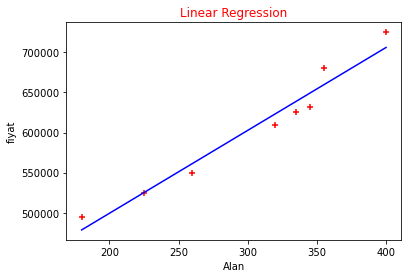

In [20]:
plt.xlabel("Alan")
plt.ylabel("fiyat")
plt.scatter(df.alan,df.fiyat,color="red",marker="+")
plt.title("Linear Regression",color="red")
plt.plot(df.alan , reg.predict(df[["alan"]]),color="blue");

Multiple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df=pd.read_csv("multilinearregression.csv",sep=";")

In [4]:
df

,alan,odasayisi,binayasi,fiyat
0,180,5,10,510000
1,225,4,18,508000
2,260,3,2,548000
3,320,6,10,650000
4,335,4,9,628000
5,345,5,14,632000
6,355,3,0,680000
7,400,4,10,725000


In [5]:
reg=linear_model.LinearRegression()
reg.fit(df[["alan","odasayisi","binayasi"]],df["fiyat"])

LinearRegression()

In [6]:
reg.predict([[275,3,11]])

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([558597.7242505])

In [7]:
reg.coef_

array([ 1018.99865454, 14893.82374984, -2606.68429997])

In [9]:
reg.intercept_

262365.1503032055

In [10]:
#Multiple Linear Regression formülü:
#y=a + b1*x1 + b2*x2 + b3*x3 +...

a=reg.intercept_
b1=reg.coef_[0]
b2=reg.coef_[1]
b3=reg.coef_[2]

x1=275
x2=3
x3=11
y=a + b1*x1 + b2*x2 + b3*x3
y

558597.7242505004

Polynomial Linear Regression

y= a + b1x + b2x^2 + b3x^3 ... +bn*x^N

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv("polynomial.csv",sep=";")


In [4]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


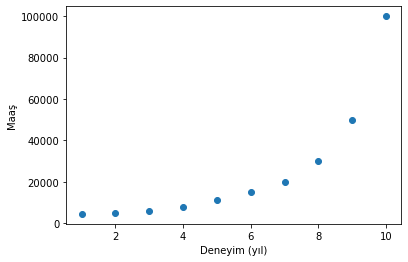

In [6]:
plt.scatter(df["deneyim"],df["maas"])
plt.xlabel("Deneyim (yıl)")
plt.ylabel("Maaş")
plt.show()

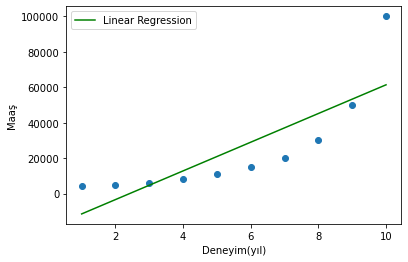

In [7]:
#Görüldüğü gibi veriler doğrusal yapıda dağılmıyor
#Eğer linear regression uygulanırsa uygun olmayan
#tahmin çizgisi görülür.

reg=LinearRegression()
reg.fit(df[["deneyim"]], df["maas"])
plt.xlabel("Deneyim(yıl)")
plt.ylabel("Maaş")

plt.scatter(df["deneyim"],df["maas"])

plt.plot(df["deneyim"],reg.predict(df[["deneyim"]]),color="green",label="Linear Regression")
plt.legend()
plt.show()

In [16]:
#Görüldüğü üzere tahmin çizgisi çok kötü çıktı.
#Şimdi polynomail regression uygulayacağız:

# Fonksionumuzun n değerini yani derecesini veri setine göre ayarlıyoruz:

polynomial_regression=PolynomialFeatures(degree=4)
x_polynomial = polynomial_regression.fit_transform(df[["deneyim"]])


In [17]:
reg=LinearRegression()
reg.fit(x_polynomial, df["maas"])

LinearRegression()

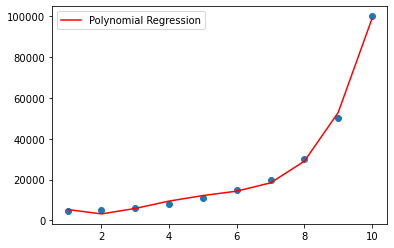

In [18]:
#Artık modelimiz hazır ve eğitilmiş,
#şimdi eldeki verilere göre modelimizin sonuç grafiğini görelim:

y_head=reg.predict(x_polynomial)
plt.plot(df["deneyim"],y_head, color="red", label="Polynomial Regression")
#plt.plot(x ekseni, y ekseni ,...)
plt.legend()
plt.scatter(df["deneyim"], df["maas"])
plt.show()

Degree yi arttırdıkça daha doğru tahmin çizgisi elde ederiz. Bunu deneyerek görebilirsin.
Fazla degree verirsek sistemi zorlarız. Bu veri seti için 4 yeterli bir degree. 

In [19]:
# Şimdi tahmin edelim:
x_polynomial1 = polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)

array([10958.21496212])

KNN (K-Nearest Neighbours)

Daha önce elde edilen noktalara bakarak yeni bir nokta geldiğinde onun hangi grupta olduğunu bulmak için kullanılır. 
En yakındaki K tane komşu nokta bulunur.
KNN yeni noktanın hangi grupta olduğunu bulurken Öklid kullanır.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


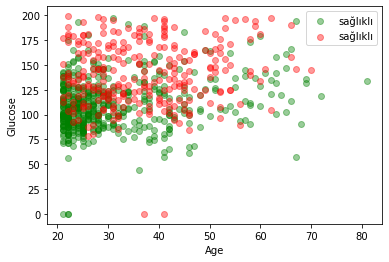

In [4]:
#Outcome = 1 (Şeker hastası)
#Outcome = 0 (Sağlıklı)
seker_hastaları=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]
#Şimdilik sadece glukoza bakarak örnek plot çizdireceğiz
plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose, color="green",label="sağlıklı",alpha=0.4)
plt.scatter(seker_hastaları.Age,seker_hastaları.Glucose, color="red",label="sağlıklı",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [5]:
#x ve y eksenlerini belirleyelim.
y=data.Outcome.values
x_ham_veri=data.drop(["Outcome"],axis=1)
#Outcome sütununu çıkartıp sadece bağımsız değişkenleri bırakıyoruz.
#Çünkü KNN algoritması x değerleri içerisinde gruplandırma yapacak.


#Normalization yapmamız gerekiyor çünkü yapmazsak yükaek rakamlar,
#küçük rakamları ezer ve KNN algoritması doğru bir hesaplama yapamaz.
#Normalization için: x_ham_veri değerlerini sadece 0 ve 1 arasında 
#olacak şekilde güncelleyeceğiz.
x=(x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))
print(x.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  


/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [7]:
#train datamız ile test datamızı ayırıyoruz.
#train data sistemin sağlıklı insan ile hasta insanı ayırt etmeyi öğrenmek için kullanılacak.
#test data makine öğrenme modelimizin doğru çalışabiliyor mu onu test edecek.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

#knn modelimizi oluşturuyoruz.
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("K=3 için test verilerimizin doğrulama testi sonucu:",knn.score(x_test,y_test))



K=3 için test verilerimizin doğrulama testi sonucu: 0.7857142857142857


In [9]:
# en iyi k değerinin belirleyelim

sayac=1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac," ","Doğruluk Oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac+=1

1   Doğruluk Oranı: % 69.48051948051948
2   Doğruluk Oranı: % 74.02597402597402
3   Doğruluk Oranı: % 78.57142857142857
4   Doğruluk Oranı: % 75.97402597402598
5   Doğruluk Oranı: % 79.87012987012987
6   Doğruluk Oranı: % 79.22077922077922
7   Doğruluk Oranı: % 81.16883116883116
8   Doğruluk Oranı: % 79.22077922077922
9   Doğruluk Oranı: % 78.57142857142857
10   Doğruluk Oranı: % 79.22077922077922


In [10]:
#En iyi k değeri 7 ymiş.

Logistic Regression

Sınıflandırma modelidir.
Sonucu 0 veya 1 gibi sadece 2 seçenek olabilecek predictionlar yapmamızı sağlar.
2 grup arasında prediction yapılacaksa Logistic Regression çoğu durumda KNN e göre çok daha yüksek doğrulukta sonuçlar verir.
2 den fazla sınıflandırmada Logistic Regression kullanılamaz.

In [1]:
import pandas as pd
import numpy 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df=pd.read_csv("logistic_regression.csv", sep=";")

In [2]:
df

,yas,sigorta
0,21,0
1,24,0
2,45,1
3,46,1
4,51,0
5,55,1
6,54,0
7,59,1
8,61,1
9,60,1


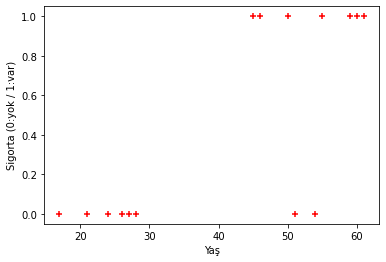

In [5]:
plt.xlabel("Yaş")
plt.ylabel("Sigorta (0:yok / 1:var)")
plt.scatter(df.yas, df.sigorta , color="red", marker="+")

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df[["yas"]],df.sigorta, train_size=0.8)

In [7]:
x_train

,yas
7,59
6,54
0,21
1,24
14,28
4,51
2,45
5,55
9,60
12,26


In [8]:
x_test

,yas
8,61
3,46
10,17


In [9]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
x_test

,yas
8,61
3,46
10,17


In [11]:
y_predicted= model.predict(x_test)
y_predicted

array([1, 0, 0])

In [12]:
y_test

8     1
3     1
10    0
Name: sigorta, dtype: int64

In [14]:
#Modelimiz bize ayrıca her bir test verisi olasılığı gösteriyor.
#İlk sonuç 0 için olasılık
#İkinci sonuç 1 için olasılık.

model.predict_proba(x_test)

array([[0.10244782, 0.89755218],
       [0.56826643, 0.43173357],
       [0.99332026, 0.00667974]])

In [19]:
# Quiz: Yaşları 33 ve 70 olan iki kişinin sigortalarını tahmin et.

In [20]:
yaslar=[33,70]
model.predict(pd.DataFrame(yaslar))
#Data Frame e çevirmeyi unutma.

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1])

Recommendation Systems

User-Based Collaborative Filtering: Kullanıcılar arası benzerliğe bakarak öneri yapar. Maliyetlidir. İnsanların zevklerinin değişmesi de dezavantajlarındandır.
Item-Based Collaborative Filtering: User-Based teki sıkıntıları aşmak için kullanılıryor. Kullanıcılar yerine Itemler arasındaki benzerliklere bakar. 

In [1]:
# Şuanda Item-Based kullanacağız.
# Movie Recommendation sistemi tasarlayacağız.
import numpy as np
import pandas as pd

In [5]:
column_names = ["user_id", "item_id", "rating", "timestamp"]
df=pd.read_csv("users.data",sep="\t", names=column_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [7]:
len(df) #kaç kayıt var görelim.

100003

In [11]:
movie_titles=pd.read_csv("movie_id_titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
len(movie_titles)

1682

In [18]:
# item_id üzerinden iki datayı birleştirdik.
df=pd.merge(df,movie_titles, on="item_id")

In [19]:
df.head()

,user_id,item_id,rating,timestamp,title_x,title_y,title
0,0,50,5,881250949,Star Wars (1977),Star Wars (1977),Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977),Star Wars (1977),Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977),Star Wars (1977),Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977),Star Wars (1977),Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977),Star Wars (1977),Star Wars (1977)


In [21]:
df=df.drop(["title_x","title_y"],axis=1)

In [22]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [23]:
# Recommendation Sistemi Kuruyoruz.
# Öncelikler Exceldeki pivot tablo benzeri bir yapı kuruyoruz.
# Bu yapıya göre her satır bir kullanıcı olacak şekilde (yani dataframemimizin indexi uder_id olacak.)
# Sütunlarda film isimleri olacak
# Tablo içinde de rating değerleri olacak şekilde bir dataframe oluşturuyoruz.

moviemat = df.pivot_table(index="user_id",columns="title", values="rating")
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
type(moviemat)

pandas.core.frame.DataFrame

Amaç: Starwars filmine benzer film önerileri yapmak.

In [26]:
# Örneğin Star Wars (1977) filminin user ratinglerine bakalım.
starwars_user_ratings = moviemat["Star Wars (1977)"]
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [27]:
# corrwith metodunu kullanarak Star Wars filmi ile korelasyonları hesaplatalım.
similar_to_starwars=moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [28]:
#Bazı kayıtlarda boşluklar olduğu için hata veriyor.
#similar_to_starwars bir seri, biz bunu corr_starwars isimli bir data frame e dönüştürelim.
#Nan kayıtlarını temizleyip bakalım.
corr_starwars=pd.DataFrame(similar_to_starwars, columns=["Correlation"])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [29]:
#Elde ettiğimiz dataframe i sıralayalım ve görelim bakalım
#star warsa en yakın tavsiye edeceği film neymiş

corr_starwars.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


Görüldüğü gibi alakasız sonuçlar çıktı. Bunun nedeni bu filmlerin çok az oy almış olması. Bu durumu düzeltmek için 100 den az oy alan filmleri eleyeceğiz. 

In [30]:
#Bu amaçla ratings isimli bir dataframe oluşturalım ve 
#burada filmlerin kaç oy aldıklarını tutalım.
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [31]:
df.drop(["timestamp"], axis=1)

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [33]:
#Her filmin oratalama rating değerini bulalım.
ratings=pd.DataFrame(df.groupby("title")["rating"].mean())
# groupby title a göre fikmleri grupluyor.

#Büyükten küçüğe sıralayalım:
ratings.sort_values("rating",ascending=False).head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [34]:
#Bu ortalamaları hesaplarken kaç oy olduğuna bakmadık.
#Bu yüzden alakasız filmler çıktı.
#Şimdi her filmin oy sayısını bulalım.
ratings["rating_oy_sayisi"]=pd.DataFrame(df.groupby("title")["rating"].count())
ratings.head()

,rating,rating_oy_sayisi
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [35]:
#Şimdi en çok oy alan filmleri büyükten küçüğe sıralayalım.
ratings.sort_values("rating_oy_sayisi",ascending=False).head()

,rating,rating_oy_sayisi
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [37]:
#Tekrar esas amacımıza dönelim ve corr_starwars dataframemimize rating_oy_sayisi sütununu ekleyelim
corr_starwars.sort_values("Correlation",ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


In [38]:
corr_starwars=corr_starwars.join(ratings["rating_oy_sayisi"])
corr_starwars.head()

,Correlation,rating_oy_sayisi
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [39]:
# Ve sonuç:
corr_starwars[corr_starwars["rating_oy_sayisi"]>100].sort_values("Correlation",ascending=False).head()

,Correlation,rating_oy_sayisi
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Decision Tree

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

df=pd.read_csv("DecisionTreesClassificationDataSet.csv")

In [2]:
df.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,Y,4,BS,N,N,Y
1,0,N,0,PhD,Y,Y,Y
2,5,Y,2,MS,N,Y,Y
3,3,N,1,BS,N,Y,Y
4,0,N,0,BS,N,N,N


sckit-learn kütüphanesi desicion treelerin düzgün çalışması için her şeyin rakamsal olmasını bekler. Bu nedenle veri setimizdeki tüm Y ve N leri 1 ve 0 değerleri olarak değiştiriyoruz. Aynı sebeple eğitim seviyesini de BS:0 MS:1 PhD:2 olarak güncelliyoruz. map() kullanarak boş veya geçersiz girdi olan hücreleri NaN ile dolduruyoruz. Buna şuanda ihtiyaç yok ancak ilerde işime yarayabilir. 

In [7]:
duzeltme_mapping={"Y":1, "N":0}

df["IseAlindi"]=df["IseAlindi"].map(duzeltme_mapping)
df["SuanCalisiyor?"]=df["SuanCalisiyor?"].map(duzeltme_mapping)
df["Top10 Universite?"]=df["Top10 Universite?"].map(duzeltme_mapping)
df["StajBizdeYaptimi?"]=df["StajBizdeYaptimi?"].map(duzeltme_mapping)

duzeltme_mapping_egitim={"BS":0, "MS":1, "PhD":2}
df["Egitim Seviyesi"]=df["Egitim Seviyesi"].map(duzeltme_mapping_egitim)
df.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,1,4,0,0,0,1
1,0,0,0,2,1,1,1
2,5,1,2,1,0,1,1
3,3,0,1,0,0,1,1
4,0,0,0,0,0,0,0


In [10]:
#Sonuç sütununu ayırıyoruz.
y=df["IseAlindi"]
x=df.drop(["IseAlindi"],axis=1)

In [11]:
#Decision Tree mizi oluşturuyoruz.
clf=tree.DecisionTreeClassifier()
cld=clf.fit(x,y)

In [12]:
#Modelimiz oluştu şimdi örnek bir prediction yapalım.
#5 yıl deneyimli, halihazırda bir yerde çalışan ve 3 eski şirkette çalışmış, eğitim seviyesi Lisans, top tier school mezunu değil.
print(clf.predict([[5,1,3,0,0,0]]))

[1]


/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Random Forest

Desicion Treeler bazı durumlarda hatalı karar vverebiliyor. Bunun nedeni flowchart bir kere oluşuyor ve hep ona göre kararlar veriliyor.

Desicion Treeye verdiğiniz dataset tam homojen değilse ve prediction yapmak istediğiniz yeni veriler eski datasetinizde nadir bulunuyorsa hata olasılığı artıyor.

Bunun önüne geçmek için birden fazla desicion treelerden oluşan random forest kullanılıyor. Random Forestler Ensemble Learning denen makine öğrenim metodojinin içine girmektedir. 
Ensemble Learningte birden fazla makine öğrenim metodu birlikte çalıştırılıp tahmin yapılır.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

df=pd.read_csv("DecisionTreesClassificationDataSet.csv")

In [2]:
df.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,Y,4,BS,N,N,Y
1,0,N,0,PhD,Y,Y,Y
2,5,Y,2,MS,N,Y,Y
3,3,N,1,BS,N,Y,Y
4,0,N,0,BS,N,N,N


In [3]:
duzeltme_mapping={"Y":1 , "N":0}
df["SuanCalisiyor?"]=df["SuanCalisiyor?"].map(duzeltme_mapping)
df["Top10 Universite?"]=df["Top10 Universite?"].map(duzeltme_mapping)
df["StajBizdeYaptimi?"]=df["StajBizdeYaptimi?"].map(duzeltme_mapping)
df["IseAlindi"]=df["IseAlindi"].map(duzeltme_mapping)

duzeltme_mapping_egitim={"BS":0, "MS":1, "PhD":2}
df["Egitim Seviyesi"]=df["Egitim Seviyesi"].map(duzeltme_mapping_egitim)
df.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,1,4,0,0,0,1
1,0,0,0,2,1,1,1
2,5,1,2,1,0,1,1
3,3,0,1,0,0,1,1
4,0,0,0,0,0,0,0


In [4]:
y=df["IseAlindi"]
x=df.drop(["IseAlindi"], axis=1)
x.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?
0,11,1,4,0,0,0
1,0,0,0,2,1,1
2,5,1,2,1,0,1
3,3,0,1,0,0,1
4,0,0,0,0,0,0


In [5]:
#Random Forest oluşturacağız:
#200 tane desicion tree birleşiminden oluşan bir Random Forest kullanacağız.
rnd_fr_clf=RandomForestClassifier(n_estimators=200,random_state=10)#n_estimators:Forest içindeki tree sayısı
rnd_fr_clf=rnd_fr_clf.fit(x,y)

#prediction yapalım:
#5 yıl deneyimli, çalışan, 3 şirkette çalışmış olan, lisans mezunu, top-tier-school mezunu değil:
rnd_fr_clf.predict([[5,1,3,0,0,0]])

K-Means Clustering

Çok fazla sayıdaki ham veriyi gruplara ayırmak için kullanılır. Ham veriler hakkında önceden sizin sınıflandırma yapmamanız gerekmektedir. Yapay zeka tüm işi kendi halleder. Unsupervised modellerden en yaygın kullanılanıdır. 
K adet centroid (merkez nokta) seçilir ve her veri kendisine en yakın centroid grubuna dahil olur.

K değerini belirlerken elbow metodu kullanılır. K değerlri ile birlikte grafiğe döktüğüğnüzde dirsek noktasında bulunan K değeri en optimal K değeri olarak kabul edilir.

K means toplu verilerinn olduğu ve gruplama yapmak istediğiniz ancak yapamadığınız her alanda kullanılabilir. Müşteri sınıflandırma alanında büyük şirketler tarafından yoğun bir şekilde kullanılmaktadır. 

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

df=pd.read_csv("Kmeans.csv")
df.head()

,Ad,Yas,Gelir
0,Ismail,28,5900
1,Kaan,42,15100
2,Ozben,27,5750
3,Galip,39,15400
4,Batuhan,41,15900


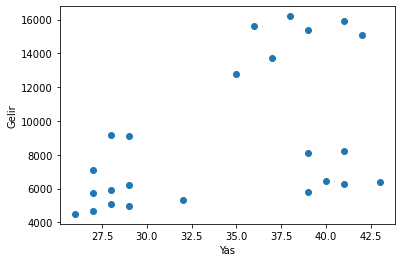

In [2]:
plt.scatter(df.Yas,df["Gelir"])
plt.xlabel("Yas")
plt.ylabel("Gelir")
plt.show()

In [3]:
# Normalization yapacağız ancak bu sefer kendimiz değil kütüphane ile yapacağız.
# MinMaxScaler() fonksiyonunu kullanacağız.

scaler=MinMaxScaler()
scaler.fit(df[["Gelir"]])
df["Gelir"]=scaler.transform(df[["Gelir"]])

scaler.fit(df[["Yas"]])
df["Yas"]=scaler.transform(df[["Yas"]])

In [4]:
df.head()

,Ad,Yas,Gelir
0,Ismail,0.117647,0.119658
1,Kaan,0.941176,0.905983
2,Ozben,0.058824,0.106838
3,Galip,0.764706,0.931624
4,Batuhan,0.882353,0.974359


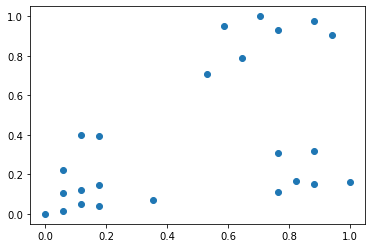

In [5]:
plt.scatter(df.Yas,df["Gelir"])
plt.show;

In [6]:
#k=3 için bir K-Means modeli oluşturalım:
kmeans_model=KMeans(n_clusters=3)
y_predicted=kmeans_model.fit_predict(df[["Yas","Gelir"]])
y_predicted

array([1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int32)

In [7]:
df["cluster"]=y_predicted
df.head()

,Ad,Yas,Gelir,cluster
0,Ismail,0.117647,0.119658,1
1,Kaan,0.941176,0.905983,2
2,Ozben,0.058824,0.106838,1
3,Galip,0.764706,0.931624,2
4,Batuhan,0.882353,0.974359,2


In [8]:
#centroidleri görelim 
kmeans_model.cluster_centers_

array([[0.85294118, 0.20299145],
       [0.12834225, 0.14219114],
       [0.72268908, 0.89377289]])

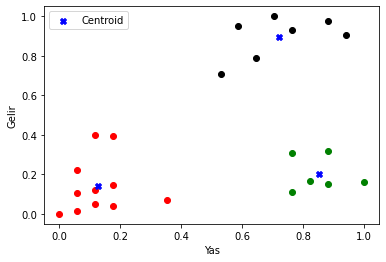

In [11]:
df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]
plt.xlabel("Yas")
plt.ylabel("Gelir")
plt.scatter(df1.Yas,df1["Gelir"],color="green")
plt.scatter(df2.Yas,df2["Gelir"],color="red")
plt.scatter(df3.Yas,df3["Gelir"],color="black")

#kmeans_model.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_model.cluster_centers_[:0]
# ve kmeans_model.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz.
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,1],color="blue",marker="X",label="Centroid")
plt.legend()
plt.show();

In [12]:
# Kimlerin hangi grupta olduğunu görüntüleyelim.

df.sort_values("cluster")[["Ad","cluster"]]

,Ad,cluster
21,Seyma,0
19,Koray,0
18,Nihal,0
17,Gurkan,0
16,Veli,0
22,Tuncer,0
0,Ismail,1
20,Melih,1
15,Rauf,1
14,Seyma,1


In [13]:
# K Değerini Belirlemek - Elbow Yöntemi

k_range = range(1,20)

list_dist=[]

for k in k_range:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(df[["Yas","Gelir"]])
    list_dist.append(kmeans_model.inertia_)

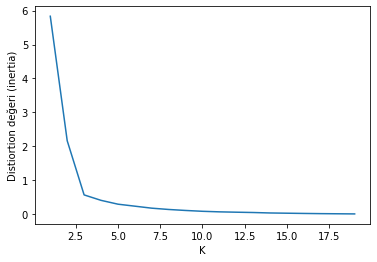

In [14]:
plt.xlabel("K")
plt.ylabel("Distiortion değeri (inertia)")
plt.plot(k_range,list_dist)
plt.show()

In [15]:
# Görüldüğü üzere bir dirsek görünümü çıktı.
# En iyi K değerimiz = 3

SVM - Support Vector Machines

Çok fazla özellik içeren veri setlerinin sınıflandırılmasında kullanılır.
Yüksek seviye matematiksel algoritmalar kullanılır. Bu kullanılan karmaşık matematiksel algoritmalara kernel-trick de denir.
Supervised Learning kapsamındadır.
Sadece sınıflandırma amaçlı kullanılır.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data=pd.read_csv("svm_dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0


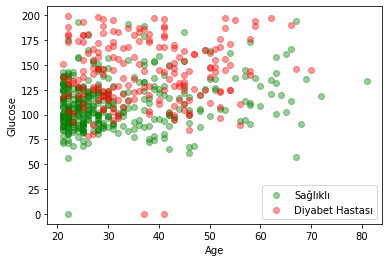

In [2]:
seker_hastalari=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]

plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="Sağlıklı", alpha=0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red",label="Diyabet Hastası", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()
#Burada sadece Glukoz ve yaş değerlerine bakarak çizim yaptık.

In [3]:
# x ve y eksenlerini belirleyelim.
y=data.Outcome.values
x_orjinal=data.drop(["Outcome"],axis=1)
# Outcome sütununu(dependent variable) çıkarıp sadece independent variable bırakıyoruz.
# Çünkü algoritmamız x değerleri içerisinde gruplandırma yapacak.

# Normalization yapıyoruz.
x=(x_orjinal-np.min(x_orjinal))/(np.max(x_orjinal)-np.min(x_orjinal))
(x.head())

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.071429,0.969849,0.438596,0.161616,0.443262,0.436027,0.246371,0.050000
1,0.785714,0.778894,0.666667,0.282828,0.177305,0.560606,0.544406,0.500000
2,0.214286,0.959799,0.596491,0.151515,0.153664,0.520202,0.094364,0.216667
3,0.214286,0.708543,0.000000,0.000000,0.000000,0.505051,0.291631,0.100000
4,0.285714,0.477387,0.614035,0.323232,0.000000,0.540404,0.228010,0.050000


In [4]:
# train datamız ile test datamızı ayırıyoruz.
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [6]:
# SVM modelimizi oluşturuyoruz.
svm_model=SVC(random_state=3)
svm_model.fit(x_train,y_train)

SVC(random_state=3)

In [7]:
# Verileri elimizde olan yeni bir kişinin şeker hastası olma ihtimallerini SVM ile bulalım:
lst=[7,128,71,34,0,35.6,0.617,50]
arr=np.array([lst])

In [8]:
df=pd.DataFrame(arr)
df

,0,1,2,3,4,5,6,7
0,7.0,128.0,71.0,34.0,0.0,35.6,0.617,50.0


In [9]:
print(svm_model.predict(df))

[0]


/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [12]:
lst2=[[7,128,71,34,0,35.6,0.617,40]]
print(svm_model.predict(lst2))

[0]


/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [15]:
# Modelimizin başarı yüzdesini bulalım:
print(svm_model.score(x_test,y_test)*100)

76.31578947368422


In [16]:
# %76 ne iyi ne de kötü bir başarı yüzdesi değil.

PCA-Principal Component Analysis

PCA ile çok boyutlu veri setlerini, veri setinin anlamını kaybetmeden daha az boyutlu bir hale getirmeyi amaçlıyoruz.
Bunu yapma nedenimiz çok boyutlu veri setlerini daha kolay görselleştirmek, verileri sıkıştırmaktır.
Kullanıldığı bazı alanlar: Veri sıkıştırma, fotoğraf sıkıştırma, yüz tanıma yapılırken algoritmaların çalıştırılmadan çnce bu işlem ile insan yüzüne ait sadece en belirgin özellikler elde edilir.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url="pca_iris.data"
df= pd.read_csv(url,names=["sepal length","sepal width","petal length","petal width","target" ])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
x=df[["sepal length","sepal width","petal length","petal width"]]
y=df[["target"]]

In [7]:
# Değerleri Scale ediyoruz(klasik normalization yapmadık dikkat et.)
x= StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

PCA Projection 4 boyuttan 2 boyuta:

Biz PCA yaparak 4 boyuttan 2 boyuta indirgeyeceğiz ancak PCA indirgeme işlemi sonucunda elde edeceğimiz 2 boyutun herhangi bir anlam ifade etmeyen başlıklara sahip olacak. Yani yaptığımız 4 featuredan 2 tanesini basit bir şekilde atmak değil.

In [8]:
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf= pd.DataFrame(data=principalComponents,columns=["principal component 1","principal component 2"])

In [9]:
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [10]:
# Şimdi en son target sütunumuzu da PCA dataframemimizin sonuna ekleyelim:
final_dataframe=pd.concat([principalDf, df[["target"]]],axis=1)

In [11]:
final_dataframe.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


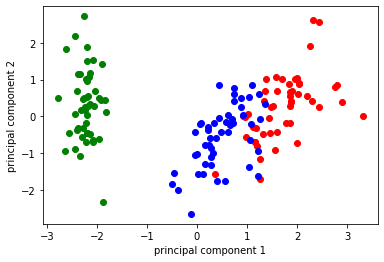

In [13]:
dfsetosa=final_dataframe[df.target=="Iris-setosa"]
dfvirginica=final_dataframe[df.target=="Iris-virginica"]
dfversicolor=final_dataframe[df.target=="Iris-versicolor"]
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

plt.scatter(dfsetosa["principal component 1"],dfsetosa["principal component 2"],color="green")
plt.scatter(dfvirginica["principal component 1"],dfvirginica["principal component 2"],color="red")
plt.scatter(dfversicolor["principal component 1"],dfversicolor["principal component 2"],color="blue")

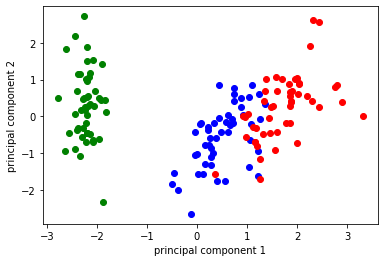

In [16]:
# Yukarıdaki çizimi daha profosyenelce çizdirelim:

targets=["Iris-setosa","Iris-versicolor","Iris-virginica"]
colors=["g","b","r"]

plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

for target, col in zip(targets,colors):
    dftemp=final_dataframe[df.target==target]
    plt.scatter(dftemp["principal component 1"], dftemp["principal component 2"],color=col)

In [17]:
# Veri setimizi ne kadar korumuşuz onu hesaplayalım:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [18]:
pca.explained_variance_ratio_.sum()

0.9580097536148199

FLASK ile RestAPI Oluşturma

In [1]:
# Örnek model yapacağız. Bu bölümde yapacağımız FLASK muhabbetleri her model için geçerlidir.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
seker_hastalari=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]
y=data.Outcome.values
x_ham_veri=data.drop(["Outcome"],axis=1)
# Normalization:
sc=MinMaxScaler()
x_ham_veri=sc.fit_transform(x_ham_veri)

x_train, x_test, y_train, y_test=train_test_split(x_ham_veri,y,test_size=0.1,random_state=1)

In [4]:
# knn modelini oluşturma:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("K=3 için test verilerimizin doğrulama testi sonucu ", knn.score(x_test,y_test))

K=3 için test verilerimizin doğrulama testi sonucu  0.8311688311688312


In [5]:
new_prediction=knn.predict(sc.transform(np.array([[6,148,72,35,0,33,0.617,50]])))

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [6]:
new_prediction

array([1])

In [7]:
# Şuana kadar yaptıklarımız daha önceden öğrendiğimiz şeyler.


KNN Machine Learning Modelimizin ve Scaler Nesnemizin Pickler dosyası olarak kaydedilmesi:

In [8]:
import pickle

In [9]:
model_dosyasi="knnmodel.pickle"
pickle.dump(knn,open(model_dosyasi,"wb")) #knn modelimizi serialize ediyoruz ve diskimize kaydediyoruz.

In [10]:
scaler_dosyasi="sc.pickle"
pickle.dump(sc,open(scaler_dosyasi,"wb")) #min max scalerimizi serialize ediyoruz ve diskimize kaydediyoruz.

Pickle dosyaları şeklinde saklanan modelimizi ve scalerimizi imprty edelim:

In [1]:
import pickle
import numpy as np

In [2]:
machine_learning_model=pickle.load(open("knnmodel.pickle","rb"))
scaler=pickle.load(open("sc.pickle","rb"))

In [3]:
new_prediction=machine_learning_model.predict(scaler.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from bs4 import BeautifulSoup
import re 
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [2]:
df=pd.read_csv("NLPlabeledData.tsv", delimiter="\t", quoting=3)

In [3]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
len(df)

25000

In [5]:
# stopwords ü temizlemek için nltk kütüphanesinden stopwords setini. indirmemiz gerekiyor.
# bu indirmeyi nltk ile yapıyoruz.
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emircancankara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Veri Temizleme İşlemleri:

In [6]:
# Bu işlemlerin nasıl yapıldığını açık anlamak için önce review seçip yapalım:

sample_review=df.review[0]
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [7]:
# Öncelikle BeautifulSoup kullanarak HTML taglerini sileceğiz
sample_review=BeautifulSoup(sample_review).get_text()
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 2

In [8]:
# Regex kullanarak noktalama işaretleri ve sayıları siliyoruz:
sample_review=re.sub("[^a-zA-Z]"," ",sample_review)
sample_review

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [9]:
# Makine öğrenim algoritmaları kelimenin içinde büyük harf var ise bunu farklı kelime olarak algılıyor.
# Bu yüzden hepsini küçük harfe dönüştürüyoruz.
sample_review= sample_review.lower()
sample_review

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    m

In [10]:
# stopwords(yani the is are gibi kelimelerin yapay zeka tarafından kullanılmamasını istiyoruz.)
# Önce split ile kelimeleri bölüyoruz ve listeye dönüştürüyoruz. Amacımız stopwords kelimeleri çıkarmak.

sample_review  = sample_review.split()
sample_review

['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with',
 'mj',
 'i',
 've',
 'started',
 'listening',
 'to',
 'his',
 'music',
 'watching',
 'the',
 'odd',
 'documentary',
 'here',
 'and',
 'there',
 'watched',
 'the',
 'wiz',
 'and',
 'watched',
 'moonwalker',
 'again',
 'maybe',
 'i',
 'just',
 'want',
 'to',
 'get',
 'a',
 'certain',
 'insight',
 'into',
 'this',
 'guy',
 'who',
 'i',
 'thought',
 'was',
 'really',
 'cool',
 'in',
 'the',
 'eighties',
 'just',
 'to',
 'maybe',
 'make',
 'up',
 'my',
 'mind',
 'whether',
 'he',
 'is',
 'guilty',
 'or',
 'innocent',
 'moonwalker',
 'is',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'which',
 'i',
 'remember',
 'going',
 'to',
 'see',
 'at',
 'the',
 'cinema',
 'when',
 'it',
 'was',
 'originally',
 'released',
 'some',
 'of',
 'it',
 'has',
 'subtle',
 'messages',
 'about',
 'mj',
 's',
 'feeling',
 'towards',
 'the',
 'press',
 'and',
 'also',
 'the',
 'obvious',
 'message',
 'of',
 'drugs',

In [11]:
# stopwordleri çıkarma işlemi:
swords=set(stopwords.words("english"))
sample_review=[w for w in sample_review if w not in swords]
sample_review

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

In [12]:
# Şimdi bütük reviewlar için yapacağız. Örnek review bitti.
# Bu işlemi fonksiyon kullanarak yapıyoruz.

def process(review):
    review=BeautifulSoup(review).get_text()
    review=re.sub("[^a-zA-Z]"," ",review)
    review=review.lower()
    review=review.split()
    swords=set(stopwords.words("english"))
    sample_review=[w for w in review if w not in swords]
    # splitted paragrafları space ile birleştiriyoruz.
    return(" ".join(review))

In [13]:
# training datamızı yukardaki fonksiyon yardımıyla temizliyoruz.
train_x_tum=[]
for r in range(len(df["review"])):
    # if işlemi zorunlu değil. Burada kullanma amacımız programımız büyük verilerde çalışırken işlemin hangi seviyede olduğunu öğrenmemiz. Olayı profosyonelleştiriyor.
    if (r+1)%1000==0:
        print("No of reviews processed=",r+1)
    train_x_tum.append(process(df["review"][r]))

/Users/emircancankara/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


No of reviews processed= 1000
No of reviews processed= 2000
No of reviews processed= 3000
No of reviews processed= 4000
No of reviews processed= 5000
No of reviews processed= 6000
No of reviews processed= 7000
No of reviews processed= 8000
No of reviews processed= 9000
No of reviews processed= 10000
No of reviews processed= 11000
No of reviews processed= 12000
No of reviews processed= 13000
No of reviews processed= 14000
No of reviews processed= 15000
No of reviews processed= 16000
No of reviews processed= 17000
No of reviews processed= 18000
No of reviews processed= 19000
No of reviews processed= 20000
No of reviews processed= 21000
No of reviews processed= 22000
No of reviews processed= 23000
No of reviews processed= 24000
No of reviews processed= 25000


Train Test Split

In [14]:
x=train_x_tum
y=np.array(df["sentiment"])

train_x,test_x,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

Bag of Words oluşturuyoruz.

Verilerimizi temizledik ancak yapay zekanın çalışması için bu metin tabanlı verileri sayılara ve bag of words denilen matrise çevirmek gerekiyor. İşte bu amaçla sklearn içinde bulunan Count Vectorizor aracını kullanıyoruz.

In [15]:
# sklearn içinde bulunan countvectorizer fonksiyonunu kullanarak max 5000 kelimelik bag of words oluşuturuyoruz.
vectorizer=CountVectorizer(max_features=5000)

# train verilerimizi feature vektör matrisine çeviriyoruz.
train_x=vectorizer.fit_transform(train_x)

In [16]:
train_x

<22500x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2638110 stored elements in Compressed Sparse Row format>

In [17]:
# Bunu arraye dönüştürüyoruz çünkü fit işlemi için array istiyor.
train_x=train_x.toarray()

In [18]:
train_y=y_train
train_x.shape, train_y.shape

((22500, 5000), (22500,))

Random Forest Modeli oluşturuyoruz ve fit ediyoruz.

In [19]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_x,train_y)

RandomForestClassifier()

In [20]:
# Şimdi sıra test datamızda
# Test verilerimizi feature vektör matrisine çeviriyoruz.
# Yani aynı işlemleri test datamız için tekrarlıyoruz.
test_xx=vectorizer.transform(test_x)

In [21]:
test_xx

<2500x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 293787 stored elements in Compressed Sparse Row format>

In [22]:
test_xx=test_xx.toarray()

In [23]:
test_xx.shape

(2500, 5000)

Prediction yapıyoruz:

In [24]:
test_predict=model.predict(test_xx)
dogruluk=roc_auc_score(y_test,test_predict)

In [25]:
print("Doğruluk Oranı: %",dogruluk*100)

Doğruluk Oranı: % 84.0637996025649


Big Data